<a href="https://colab.research.google.com/github/fabrytp8/AG1/blob/main/examen/Examen_C1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EXAMEN - Convocatoria 1 - Desarrollo
Utilizar el conjunto de datos "dataset_exam.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1) Partición de datos externa (1.5 puntos)
Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42).
Comprobar si los datos, tanto de train como de test, están balanceados.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
# import pprint
ds=np.load('dataset_exam.npy')
X = ds[:,:-1]
y = ds[:,-1]
# Test: hold-out split 80-20%. # Partición externa
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
valores_test, ocur_test = np.unique(y_training, return_counts=True)
print('Test: ', 'clases:', valores_test, ' ocurrencias: ', ocur_test) #si esta balanceado con la semilla en 42

Test:  clases: [0. 1.]  ocurrencias:  [195 198]


#### 2) Estandarización de los datos de train y test (1.5 puntos)
Utilizar el método StandardScaler().

In [ ]:
# Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
stdr_trained = standardizer.fit(X_training)
X_stdr = stdr_trained.transform(X_training)
# y_stdr = standardizer.fit_transform(y_training)


#### 3) Selección de atributos en train y test (1.5 puntos)
Aplicar el método de información mutua para clasificación en el percentile 90.

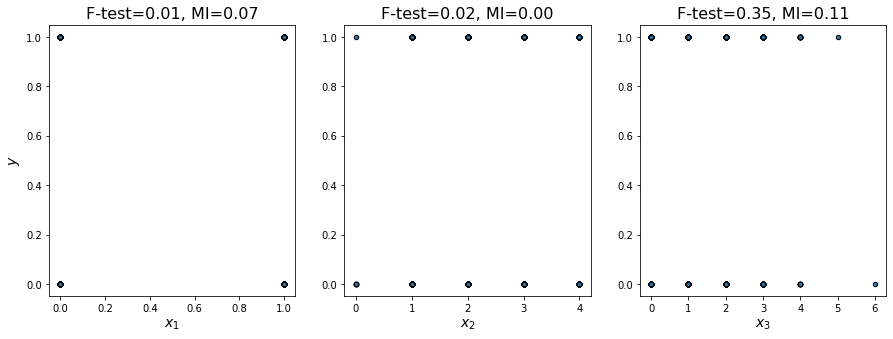

In [ ]:
from sklearn.feature_selection import f_regression, mutual_info_regression
import matplotlib.pyplot as plt
# Evaluación de atributos: F-Test.
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)
# Evaluación de atributos: información mutua.
mi = mutual_info_regression(X, y)
mi /= np.max(mi)
# Graficar distribución de los datos y evaluación de atributos.
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
              mi[i]), fontsize=16)
plt.show()

#### 4) Comparación de modelos de clasifición mediante validación cruzada (2.5 puntos)
Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: Regresión Logística y Support Vector Machine. La comparación debe realizarse únicamente en términos de exactitud proporcionando resultados de media +- desviación estándar.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# Construcción del algoritmo de aprendizaje.
reg = linear_model.LinearRegression()
# Veamos qué ocurre con un modelo más complejo que "dummyclassifier"
# Hacemos el cross-validation interno para seleccionar los mejores hiperparámetros
from sklearn.svm import SVC
svc = SVC(C=0.5)
results = cross_val_score(svc, X_training, y_training, cv = KFold(n_splits=5))
print("Resultados por bolsa: ", results)
print("Accuracy (media +/- desv.): %0.4f +/- %0.4f" % (results.mean(), results.std()))

Resultados por bolsa:  [0.74683544 0.65822785 0.60759494 0.73076923 0.73076923]
Accuracy (media +/- desv.): 0.6948 +/- 0.0534


In [ ]:
#Regresión logística
import sklearn.metrics as metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold
from sklearn import preprocessing
from evaluacion_funciones import *

# Métricas de evaluación.
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')}
# Construcción del algoritmo de aprendizaje.
algoritmos = {'LOGR': LogisticRegression(penalty='l2', solver='saga', max_iter=1000, random_state=42, multi_class='ovr')}
# 5.1) Validación cruzada interna y Optimización de los hiperparámetros
y_pred = {}
for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X_stdr, y_training, cv=KFold(n_splits=10, shuffle=True, random_state=42))
    results = evaluacion(y_training, y_pred[nombre], metricas)
    print(metrics.confusion_matrix(y_training, y_pred[nombre]))
    print(results)

[[135  60]
 [ 64 134]]
{'ACC': 0.6844783715012722, 'PREC': 0.6844783715012722, 'RECALL': 0.6844783715012722, 'F1': 0.6844783715012722}


#### 5) Evaluación de los modelos sobre el conjunto de test (3 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento.
- Evaluar su rendimiento sobre el conjunto de test.
- Mostrar en una única figura la comparación de las curvas ROC obtenidas para cada modelo.
- Crear una tabla donde se muestren los resultados de todos los modelos.
 * Las filas serán: Precisión, Sensibilidad, F-score, Exactitud y AUC
 * Las columnas serán: LR y SVM
- Mostrar la matriz de confusión proporcionada por el mejor modelo. 